In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets._samples_generator import make_blobs 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv("D:\Sklearn\Data\Customer_data.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [8]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)'>

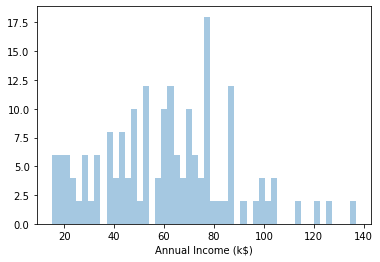

In [10]:
sns.distplot(df["Annual Income (k$)"],kde=False,bins=50)

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)'>

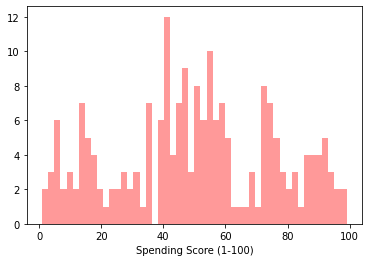

In [12]:
sns.distplot(df["Spending Score (1-100)"],kde=False,bins=50,color='red')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

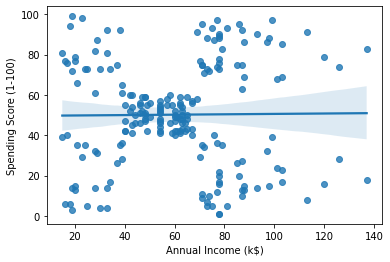

In [13]:
sns.regplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

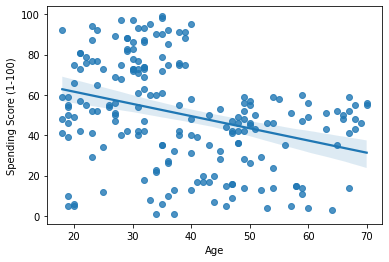

In [14]:
sns.regplot(x='Age',y='Spending Score (1-100)',data=df)

### Note :
We want to perform K-Means clustering based on the annual income and spending score columns because we want to target a customer base with high income and high spending scores.

In [16]:
df_filt = df.filter(['Annual Income (k$)','Spending Score (1-100)'],axis=1)
df_filt.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [17]:
km_model = KMeans(n_clusters=5)

km_model.fit(df_filt)

KMeans(n_clusters=5)

In [18]:
print(km_model.cluster_centers_)

[[86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]


In [19]:
print(km_model.labels_)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 2 1 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 3 0 2 0 3 0 3 0 2 0 3 0 3 0 3 0 3 0 2 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


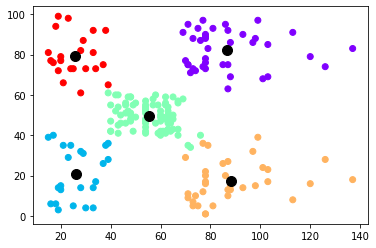

In [21]:
#plot the centers
plt.scatter(df_filt.values[:,0],df_filt.values[:,1],c=km_model.labels_,cmap="rainbow")

#plot the centers
plt.scatter(km_model.cluster_centers_[:,0],km_model.cluster_centers_[:,1],s=100,c='black')

### The Elbow Method to find optimal number of K

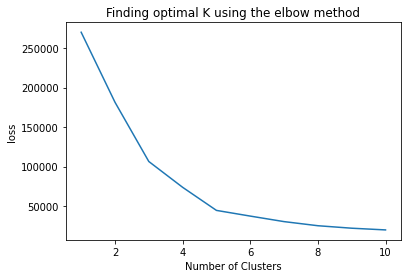

In [23]:
loss =[]

for i in range(1,11):
    km = KMeans(n_clusters=i).fit(df_filt)
    loss.append(km.inertia_)


plt.plot(range(1,11),loss)
plt.title("Finding optimal K using the elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("loss")
plt.show()

# Intertia value does not fall much after 5 clusters so let's use K = 5

In [24]:
km = KMeans(n_clusters=5)
km.fit(df_filt)

KMeans(n_clusters=5)

In [25]:
km.inertia_,km.cluster_centers_

(44448.45544793371,
 array([[26.30434783, 20.91304348],
        [88.2       , 17.11428571],
        [55.2962963 , 49.51851852],
        [25.72727273, 79.36363636],
        [86.53846154, 82.12820513]]))

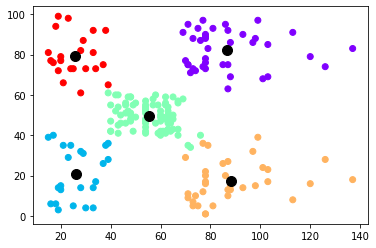

In [26]:
#plot the centers
plt.scatter(df_filt.values[:,0],df_filt.values[:,1],c=km_model.labels_,cmap="rainbow")

#plot the centers
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c='black')

In [27]:
km.cluster_centers_

array([[26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [42]:
cluster_map = pd.DataFrame()
cluster_map['dataindex'] = df.index.values
cluster_map['clusters'] = km.labels_
cluster_map

,dataindex,clusters
0,0,0
1,1,3
2,2,0
3,3,3
4,4,0
...,...,...
195,195,4
196,196,1
197,197,4
198,198,1


In [36]:
type(km.labels_)

numpy.ndarray

In [45]:
cluster_map_  = cluster_map[cluster_map.clusters == 4]
cluster_map_.head()

,dataindex,clusters
123,123,4
125,125,4
127,127,4
129,129,4
131,131,4
